<a href="https://colab.research.google.com/github/dagomezb/ML-en-Salud/blob/main/caso_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción**

Al realizar cualquier proyecto de Machine Learning, lo más importante es el Pipeline que incluye principalmente los siguientes componentes:

* Preprocesamiento de datos,
* Análisis exploratorio de datos,
* Ingeniería de características,
* Construcción y evaluación de modelos, etc.

Por lo tanto, para los aspirantes a ingenieros de ML y científicos de datos, se vuelve muy importante comprender el pipeline de ML.

Entonces, en este notebook, analizaremos el pipeline de aprendizaje automático con la ayuda de un proyecto de aprendizaje automático de Medical Dataset.

**Planteamiento del problema**

Construiremos un modelo de regresión lineal para el conjunto de datos de costos médicos.

El conjunto de datos contiene edad, sexo, IMC (índice de masa corporal
índice), niños, fumadores y características de la región, como variables independientes, y el costo como variable dependiente.

Predeciremos los costos médicos individuales facturados
por seguro de salud.

**Definición y principio de funcionamiento**

* La Regresión Lineal es un algoritmo de aprendizaje supervisado utilizado cuando el objetivo/variable dependiente es continua (números reales).
* Encuentra una relación entre la variable dependiente "y" y una o más variables independientes "x" usando la línea de mejor ajuste.
* Funciona según el principio de mínimos cuadrados ordinarios (OLS) o error cuadrático medio (MSE).
* En Estadística, OLS es un método para estimar parámetros desconocidos de la función de regresión lineal, su objetivo es minimizar la suma de las diferencias al cuadrado entre las variables dependientes observadas en el conjunto de datos dado y las predichas por el algoritmo de Regresión Lineal.

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

Cargamos los datos

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
print('nNumber of rows and columns in the data set: ',{'Rows':df.shape[0], 'columns':df.shape[1]})

nNumber of rows and columns in the data set:  {'Rows': 1338, 'columns': 7}


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


## **Análisis Exploratorio de los Datos**

In [ ]:
#Buscamos registros duplicados

duplicate=df.duplicated()
print(duplicate.sum())

1


In [ ]:
#Removemos registros duplicados

df.drop_duplicates(inplace=True)

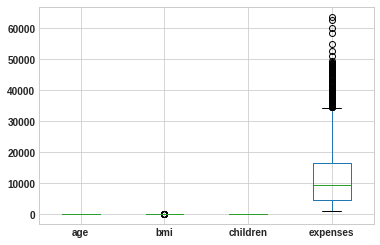

In [ ]:
#Utilizamos visualizaciones para encontrar por ejemplo outliers

df.boxplot();

In [ ]:
#Tipos de datos en las columnas

print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object


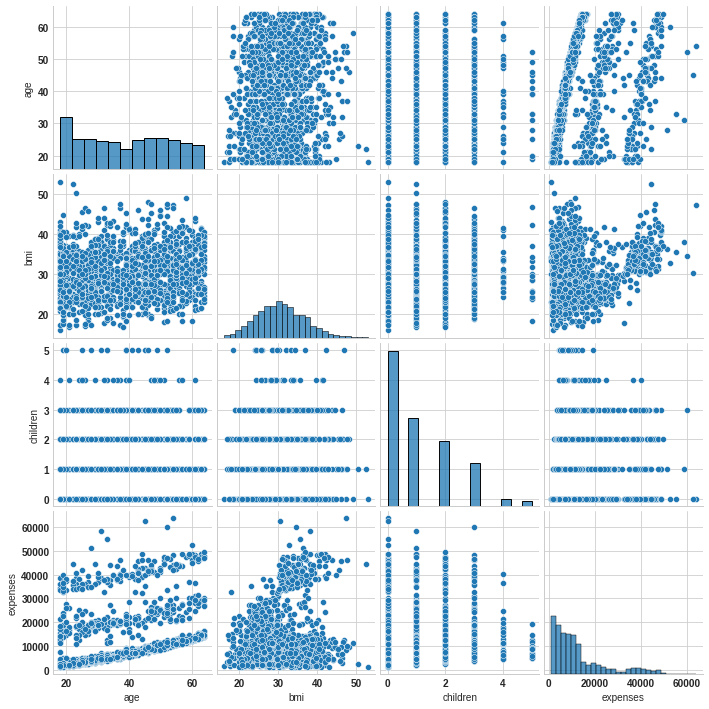

In [ ]:
sns.pairplot(df);

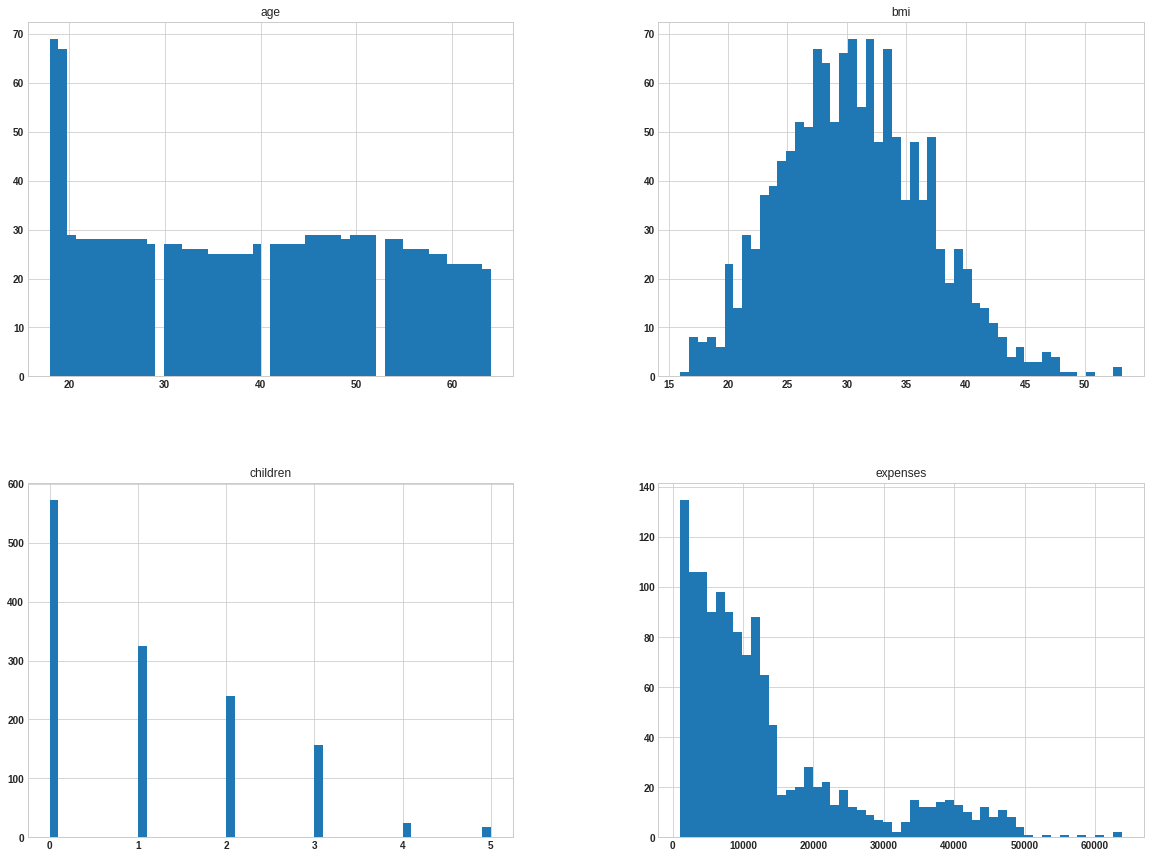

In [ ]:
df.hist(bins=50, figsize=(20, 15));

**Conclusión:** trazando el histograma para columnas numéricas, observamos que 'bmi' es casi distribuida normalmente, mientras que los "costos" probablemente estén sesgadas hacia la derecha.

In [ ]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 115.9+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
#Nombre de columnas categóricas

cat_cols=[col for col in df.columns if df[col].dtypes=='O']
cat_cols

['sex', 'smoker', 'region']

In [ ]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
#Valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

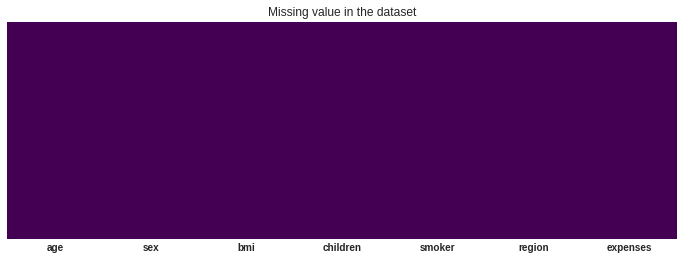

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

No hay valores faltantes

In [ ]:
#Matriz de correlación

corr_mat=df.corr()
corr_mat

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


In [ ]:
corr_mat['expenses'].sort_values(ascending=False)

expenses    1.000000
age         0.298308
bmi         0.198637
children    0.067389
Name: expenses, dtype: float64

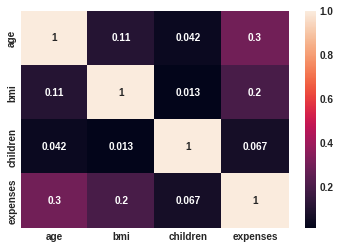

In [ ]:
sns.heatmap(df.corr(),annot= True);

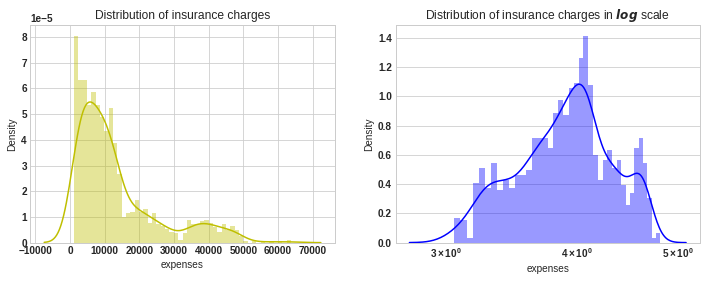

In [ ]:
import warnings
warnings.filterwarnings('ignore')
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='y',ax=ax)
ax.set_title('Distribution of insurance charges')
ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log');

**Conclusión:** 

Si nos fijamos en la figura de la izquierda los cpstps varían
de 1120 a 63500, el gráfico está sesgado a la derecha. Y en el segundo gráfico, aplicaremos un logaritmo natural, entonces el gráfico tiende aproximadamente a la normalidad. Para continuar el análisis, consideraremos el log sobre los costos (variable objetivo).

**Preprocesamiento de datos**

Los algoritmos de aprendizaje automático no pueden trabajar directamente con datos categóricos, por lo que tenemos que convertir los datos categóricos en números. Hay principalmente tres técnicas para hacer esto:

* **Codificación de etiquetas:** la codificación de etiquetas se refiere a transformar las etiquetas de palabras en números para que los algoritmos puedan entender cómo operar sobre ellos.
* **One-hot encoding:** Representa las variables categóricas en forma de vectores binarios. Permite que la representación de datos categóricos sea más expresiva. En primer lugar, los valores categóricos se han asignado a valores enteros, lo que se conoce como codificación de etiquetas. Luego, cada valor entero se representa como un vector binario que tiene todos los valores cero excepto el índice del entero, que está marcado con 1.
* **Dummy variable:** En este problema, usamos variables Dummy. 
Usando la función pandas get_dummies podemos hacer todos los tres pasos anteriores en la línea de código. Utilizaremos esta función para obtener variables Dummy para el sexo, niños, fumador, características de la región.

In [ ]:
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_', columns = cat_cols, drop_first =True, dtype='int8')

In [ ]:
print('Columns in original data frame:n',df.columns.values)
print('nNumber of rows and columns in the dataset:',df.shape)
print('nColumns in data frame after encoding dummy variable:n',df_encode.columns.values)
print('nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:n ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']
nNumber of rows and columns in the dataset: (1337, 7)
nColumns in data frame after encoding dummy variable:n ['age' 'bmi' 'children' 'expenses' 'OHE_male' 'OHE_yes' 'OHE_northwest'
 'OHE_southeast' 'OHE_southwest']
nNumber of rows and columns in the dataset: (1337, 9)


In [ ]:
df_encode.head()

,age,bmi,children,expenses,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [ ]:
df_encode['expenses'] = np.log(df_encode['expenses'])

### Crear conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
# Independent variables(predictor)
X = df_encode.drop('expenses',axis=1)
# dependent variable(response)
y = df_encode['expenses'] 
# Now, split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True,normalize=False)
lin_reg.fit(X_train,y_train)
#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.109407,7.109407
1,theta_1,age,0.033717,0.033717
2,theta_2,bmi,0.011758,0.011758
3,theta_3,children,0.093819,0.093819
4,theta_4,OHE_male,-0.072279,-0.072279
5,theta_5,OHE_yes,1.548278,1.548278
6,theta_6,OHE_northwest,-0.041551,-0.041551
7,theta_7,OHE_southeast,-0.128597,-0.128597
8,theta_8,OHE_southwest,-0.121670,-0.121670


In [ ]:
y_pred_norm =  np.matmul(X_test_0,theta)
#Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]
# R_square calculation
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)

In [ ]:
y_pred_sk = lin_reg.predict(X_test)
#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
# R_square
R_square_sk = lin_reg.score(X_test,y_test)

In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.1902593331069672


In [ ]:
print('The R_2 score by using the normal equation is: ',R_square)

The R_2 score by using the normal equation is:  0.7859180245625296


In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.19025933310696522


In [ ]:
print('The R_2 score by using the sklearn library is: ',R_square_sk)

The R_2 score by using the sklearn library is:  0.7859180245625318


In [44]:
import statsmodels.formula.api as sm

In [52]:
formula1 = 'expenses ~ age + bmi + children'
formula1

'expenses ~ age + bmi + children'

In [53]:
model1 = sm.ols(formula = formula1, data = df)

In [54]:
fitted1 = model1.fit()

In [55]:
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.45
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.21e-36
Time:                        20:52:38   Log-Likelihood:                -14382.
No. Observations:                1337   AIC:                         2.877e+04
Df Residuals:                    1333   BIC:                         2.879e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6906.4176   1758.405     -3.928      0.0